# Climate Change Data Analysis Based On Green House Gas Emissions Data 
______________________________________________________________________

## Climate Change Data Analysis Based On Green House Gas Emissions Data for Annex I



Data from UNFCCC website

Packages to be imported 

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import plotly.express as px 
import plotly.graph_objs as go


### Climate Change Data Analysis Based On Green House Gas Emissions Data by sector

In [3]:


# Read the Excel file into a pandas DataFrame
# Specify the file path and the sheet name
ghg_annexi_sector_query_df = pd.read_excel("data/green_house_gas/ghg_main_UNFCCC/ghg_AnnexI/ANI_ghg_profile.xlsx", sheet_name="Data_by_sector")

# Display the shape of the DataFrame (number of rows and columns)
ghg_annexi_sector_query_df.shape


(101, 35)

In [4]:
# Display the first 5 rows of the DataFrame

ghg_annexi_sector_query_df.head(5)


,"GHG emissions, kt CO2 equivalent",Base year,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Change from BY (Convention) to 2021
0,Summary Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Breakdown by sub-sectors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1. Energy,15374603.230184,15222331.941807,14955850.795462,14477487.128369,14323504.150811,14108731.341488,14164166.375465,14463130.445198,14348676.294826,...,13899313.891415,13667367.447593,13492745.371943,13324914.458134,13335453.667473,13445534.624305,13101452.035826,11981271.538869,12210267.2481,-0.205816
4,1.A.1. Energy industries,5918804.313281,5877323.024068,5764598.873593,5711247.834653,5650494.529387,5586407.883575,5540438.89143,5631639.683425,5620007.119423,...,5732457.500177,5601330.080674,5396939.232654,5229556.036219,5123128.784971,5067743.921364,4738127.784212,4385202.898625,4421275.713813,-0.253012


In [5]:
# Display the last 5 rows of the DataFrame

ghg_annexi_sector_query_df.tail(5)


,"GHG emissions, kt CO2 equivalent",Base year,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Change from BY (Convention) to 2021
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.011535,-0.005045,-0.017899,0.008003,0.008353,0.004846,-0.014153,-0.038651,-0.013264
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.048362,0.027696,0.046072,0.035913,-0.02547,-0.000433,0.007819,0.010617,0.06423
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.042619,-0.007316,-0.042509,-0.014488,0.06034,-0.008878,-0.061136,-0.017497,-0.008239
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.00646,-0.000161,0.005383,0.003986,0.009564,-0.001469,-0.00148,-0.024466,-0.005193
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.010071,0.012073,0.040297,-0.026555,0.049635,-0.119528,0.02672,0.110015,-0.001637


In [6]:
# Retrieve the column names of the DataFrame
ghg_annexi_sector_query_df.columns

Index(['GHG emissions, kt CO2 equivalent', 'Base year', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', 'Change from BY (Convention) to 2021'],
      dtype='object')


## Data Cleaning of the dataframe:df_ghg_annexi_sector

Drop the first row (Summary Total) as  all the values in the row are NAN

In [7]:
ghg_annexi_sector_query_df.drop([0],axis=0,inplace=True)


Total number of rows has been reduced to 108 as see below 

In [8]:
ghg_annexi_sector_query_df.shape

(100, 35)

Drop the columns Base year and 1990 as most of the values are NAN

In [9]:
columns_to_drop = ['Base year','1990']
ghg_annexi_sector_query_df.drop(columns_to_drop,axis=1,inplace=True)

Two columns has been dropped

In [10]:
ghg_annexi_sector_query_df.info()
ghg_annexi_sector_query_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   GHG emissions, kt CO2 equivalent     44 non-null     object
 1   1991                                 43 non-null     object
 2   1992                                 43 non-null     object
 3   1993                                 43 non-null     object
 4   1994                                 43 non-null     object
 5   1995                                 43 non-null     object
 6   1996                                 43 non-null     object
 7   1997                                 43 non-null     object
 8   1998                                 43 non-null     object
 9   1999                                 43 non-null     object
 10  2000                                 43 non-null     object
 11  2001                                 43 non-n

(100, 33)

Drop the rows which has NAN values 

In [11]:
ghg_annexi_sector_query_df.dropna(inplace=True)

In [12]:
# Reset the index of the DataFrame
ghg_annexi_sector_query_df.reset_index(drop=True, inplace=True)

In [13]:
# Rename a column in the DataFrame
ghg_annexi_sector_query_df.rename(columns={'Change from BY (Convention) to 2021':'Change from 1991 to 2021'},inplace=True)

Check for any null values

In [14]:
ghg_annexi_sector_query_df.isnull().sum()

GHG emissions, kt CO2 equivalent    0
1991                                0
1992                                0
1993                                0
1994                                0
1995                                0
1996                                0
1997                                0
1998                                0
1999                                0
2000                                0
2001                                0
2002                                0
2003                                0
2004                                0
2005                                0
2006                                0
2007                                0
2008                                0
2009                                0
2010                                0
2011                                0
2012                                0
2013                                0
2014                                0
2015                                0
2016        

Create a new dataframe for the analysis and visualization purpose

 ## Assign the  cleaned dataframe  into a new dataframe for  data analysis and visualization 

In [15]:
cleaned_ghg_annexi_sector_query_df = ghg_annexi_sector_query_df

In [16]:
cleaned_ghg_annexi_sector_query_df.head(5)

,"GHG emissions, kt CO2 equivalent",1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Change from 1991 to 2021
0,1. Energy,14955850.795462,14477487.128369,14323504.150811,14108731.341488,14164166.375465,14463130.445198,14348676.294826,14342488.57501,14378570.39856,...,13899313.891415,13667367.447593,13492745.371943,13324914.458134,13335453.667473,13445534.624305,13101452.035826,11981271.538869,12210267.2481,-0.205816
1,1.A.1. Energy industries,5764598.873593,5711247.834653,5650494.529387,5586407.883575,5540438.89143,5631639.683425,5620007.119423,5729098.321683,5689593.528802,...,5732457.500177,5601330.080674,5396939.232654,5229556.036219,5123128.784971,5067743.921364,4738127.784212,4385202.898625,4421275.713813,-0.253012
2,1.A.2. Manufacturing Industries and Construction,2301850.30424,2161529.511401,2103510.779695,2059491.260778,2122387.955181,2190551.463676,2144216.475113,2064982.931716,2004135.355533,...,1810901.750365,1758013.385399,1742561.360255,1771146.884609,1784175.758032,1795327.339545,1765910.665339,1666580.209264,1706211.259158,-0.287592
3,1.A.3. Transport,3096800.926218,3127793.804507,3137464.233077,3186316.397645,3236938.934151,3315847.020353,3330001.045713,3397718.322576,3488151.507267,...,3448060.159377,3497146.424019,3535510.908747,3583251.795036,3626185.885099,3669841.952307,3668710.237933,3198938.170762,3376465.073625,0.070244
4,1.A.4. Other sectors,2141927.841199,2083273.836162,2097814.559032,2002846.940265,2006713.536355,2089080.309818,2003799.643355,1920824.927898,1948554.324904,...,1787944.87179,1710685.001334,1734479.551613,1712078.165201,1744661.842186,1813398.384629,1803574.297453,1689006.306513,1703457.783913,-0.216288


In [18]:
# Display the columns of the cleaned data frame
cleaned_ghg_annexi_sector_query_df.columns

Index(['GHG emissions, kt CO2 equivalent', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Change from 1991 to 2021'],
      dtype='object')

## Now I want to seperate the data into  two different years 1991 and 2021

In [70]:
#  Dataframe for the year 1991
ghg_emissions_sector_1991 = cleaned_ghg_annexi_sector_query_df.groupby("GHG emissions, kt CO2 equivalent")['1991'].unique().reset_index()
# display the first 5rows
# ghg_emissions_sector_1991.head(5)

,"GHG emissions, kt CO2 equivalent",1991
0,1. Energy,[14955850.79546164]
1,1.A.1. Energy industries,[5764598.873592821]
2,1.A.2. Manufacturing Industries and Construction,[2301850.304240055]
3,1.A.3. Transport,[3096800.926218438]
4,1.A.4. Other sectors,[2141927.8411988514]


In [71]:
#  Dataframe for the year 2021
ghg_emissions_sector_2021 = cleaned_ghg_annexi_sector_query_df.groupby("GHG emissions, kt CO2 equivalent")['2021'].unique().reset_index()
# Display the first 5 rows
# ghg_emissions_sector_2021.head(5)

,"GHG emissions, kt CO2 equivalent",2021
0,1. Energy,[12210267.24810036]
1,1.A.1. Energy industries,[4421275.713813252]
2,1.A.2. Manufacturing Industries and Construction,[1706211.2591578925]
3,1.A.3. Transport,[3376465.0736249182]
4,1.A.4. Other sectors,[1703457.7839134876]


In [21]:
# Initilize the list for each sector
energy_sector_list =[]
industrial_processes_product_use = []
agriculture = []
LULUCF = []
waste = []


In [22]:
energy_sector_list = ["1. Energy","1.A.1. Energy industries", "1.A.2. Manufacturing Industries and Construction", "1.A.3. Transport", "1.A.4. Other sectors","1.A.5. Other (not specified elsewhere)","1.B. Fugitive Emissions from Fuels","1.C. CO2 Transport and Storage"]

In [23]:
industrial_processes_product_use = ["2. Industrial Processes and Product Use", "2.A. Mineral Products", "2.B. Chemical Industry","2.C. Metal Production","2.D. Non-energy Products from Fuels and Solven...", "2.E. Electronics industry", "2.F. Product Uses as Substitutes for ODS", "2.G. Other Product Manufacture and Use", "2.H. Other"]

In [24]:
agriculture =["3. Agriculture", "3.A. Enteric Fermentation", "3.B. Manure management", "3.C. Rice cultivation", "3.D. Agricultural Soils", "3.E. Prescribed Burning of Savannas", "3.F. Field Burning of Agricultural Residues", "3.G. Liming", "3.H. Urea Application", "3.I. Other Carbon-containing Fertilizers", "3.J. Other"]

In [25]:
LULUCF = ["4. LULUCF", "4.A. Forest Land", "4.B. Cropland", "4.C. Grassland", "4.D. Wetlands", "4.E. Settlements", "4.F. Other Land", "4.G. Harvested Wood Products", "4.H. Other"]

In [26]:
waste = ["5. Waste", "5.A. Solid Waste Disposal", "5.B. Biological Treatment of Solid Waste", "5.C. Incineration and Open Burning of Waste", "5.D. Wastewater Treatment and Discharge", "5.E. Other"]

#### Filtering the dataframe for the sub sector "energy sector" for year 1991

In [27]:
# Create a new column 'energy_sector' in the DataFrame 'ghg_emissions_sector_1991'
ghg_emissions_sector_1991['energy_sector'] = ghg_emissions_sector_1991.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in energy_sector_list), axis=1
)
# Create a new DataFrame 'ghg_emissions_sector_1991_energy_sector_df' containing only rows where 'energy_sector' is True
# Use the 'copy()' method to create a copy of the DataFrame to avoid modifying the original DataFrame
ghg_emissions_sector_1991_energy_sector_df = ghg_emissions_sector_1991[ghg_emissions_sector_1991['energy_sector']].copy()

ghg_emissions_sector_1991_energy_sector_df.drop('energy_sector', axis=1, inplace=True)
# Reset the index of the new DataFrame 'ghg_emissions_sector_1991_energy_sector_df'
ghg_emissions_sector_1991_energy_sector_df.reset_index(drop=True,inplace=True)

#### Filtering the dataframe for the sub sector "energy sector" for year 2021

In [28]:
columns_to_drop = []
ghg_emissions_sector_2021['energy_sector'] = ghg_emissions_sector_2021.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in energy_sector_list), axis=1
)

ghg_emissions_sector_2021_energy_sector_df = ghg_emissions_sector_2021[ghg_emissions_sector_2021['energy_sector']].copy()
columns_to_drop =['energy_sector']
ghg_emissions_sector_2021_energy_sector_df.drop(columns_to_drop, axis=1, inplace=True)

ghg_emissions_sector_2021_energy_sector_df.reset_index(drop=True,inplace=True)

#### Filtering the dataframe for the sub sector "industrial_processes_product_use" for year 1991

In [29]:
ghg_emissions_sector_1991['industrial_processes_product_use'] = ghg_emissions_sector_1991.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in industrial_processes_product_use), axis=1
)

ghg_emissions_sector_1991_industrial_processes_product_use_df = ghg_emissions_sector_1991[ghg_emissions_sector_1991['industrial_processes_product_use']].copy()
columns_to_drop =['energy_sector','industrial_processes_product_use']
ghg_emissions_sector_1991_industrial_processes_product_use_df.drop(columns_to_drop, axis=1, inplace=True)
ghg_emissions_sector_1991_industrial_processes_product_use_df.reset_index(drop= True, inplace=True)


#### Filtering the dataframe for the sub sector "industrial_processes_product_use" for year 2021

In [30]:
ghg_emissions_sector_2021['industrial_processes_product_use'] = ghg_emissions_sector_2021.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in industrial_processes_product_use), axis=1
)

ghg_emissions_sector_2021_industrial_processes_product_use_df = ghg_emissions_sector_2021[ghg_emissions_sector_2021['industrial_processes_product_use']].copy()
columns_to_drop =['energy_sector','industrial_processes_product_use']
ghg_emissions_sector_2021_industrial_processes_product_use_df.drop(columns_to_drop, axis=1, inplace=True)
ghg_emissions_sector_2021_industrial_processes_product_use_df.reset_index(drop= True, inplace=True)


#### Filtering the dataframe for the sub sector "agriculture" for year 1991

In [31]:
ghg_emissions_sector_1991['agriculture'] = ghg_emissions_sector_1991.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in agriculture), axis=1
)

ghg_emissions_sector_1991_agriculture_df = ghg_emissions_sector_1991[ghg_emissions_sector_1991['agriculture']].copy()
columns_to_drop =['energy_sector','industrial_processes_product_use','agriculture']
ghg_emissions_sector_1991_agriculture_df.drop(columns_to_drop, axis=1, inplace=True)
ghg_emissions_sector_1991_agriculture_df.reset_index(drop= True,inplace =True)

### Filtering the dataframe for the sub sector "agriculture" for year 2021

In [32]:
ghg_emissions_sector_2021['agriculture'] = ghg_emissions_sector_2021.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in agriculture), axis=1
)

ghg_emissions_sector_2021_agriculture_df = ghg_emissions_sector_2021[ghg_emissions_sector_2021['agriculture']].copy()
columns_to_drop =['energy_sector','industrial_processes_product_use','agriculture']
ghg_emissions_sector_2021_agriculture_df.drop(columns_to_drop, axis=1, inplace=True)
ghg_emissions_sector_2021_agriculture_df.reset_index(drop= True,inplace =True)

#### Filtering the dataframe for the sub sector "LULUCF" for year 1991

In [33]:
ghg_emissions_sector_1991['LULUCF'] = ghg_emissions_sector_1991.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in LULUCF), axis=1
)

ghg_emissions_sector_1991_LULUCF_df = ghg_emissions_sector_1991[ghg_emissions_sector_1991['LULUCF']].copy()
columns_to_drop =['energy_sector','industrial_processes_product_use','agriculture','LULUCF']
ghg_emissions_sector_1991_LULUCF_df.drop(columns_to_drop, axis=1, inplace=True)
ghg_emissions_sector_1991_LULUCF_df.reset_index(drop = True, inplace =True)

#### Filtering the dataframe for the sub sector "LULUCF" for year 2021

In [34]:
ghg_emissions_sector_2021['LULUCF'] = ghg_emissions_sector_2021.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in LULUCF), axis=1
)

ghg_emissions_sector_2021_LULUCF_df = ghg_emissions_sector_2021[ghg_emissions_sector_2021['LULUCF']].copy()
columns_to_drop =['energy_sector','industrial_processes_product_use','agriculture','LULUCF']
ghg_emissions_sector_2021_LULUCF_df.drop(columns_to_drop, axis=1, inplace=True)
ghg_emissions_sector_2021_LULUCF_df.reset_index(drop = True, inplace =True)

#### Filtering the dataframe for the sub sector "waste" for year 1991

In [35]:
ghg_emissions_sector_1991['waste'] = ghg_emissions_sector_1991.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in waste), axis=1
)

ghg_emissions_sector_1991_waste_df = ghg_emissions_sector_1991[ghg_emissions_sector_1991['waste']].copy()
columns_to_drop =['energy_sector','industrial_processes_product_use','agriculture','LULUCF','waste']
ghg_emissions_sector_1991_waste_df.drop(columns_to_drop, axis=1, inplace=True)
ghg_emissions_sector_1991_waste_df.reset_index(drop= True, inplace= True)

#### Filtering the dataframe for the sub sector "waste" for year 2021

In [36]:
ghg_emissions_sector_2021['waste'] = ghg_emissions_sector_2021.apply(
    lambda row: any(val in row["GHG emissions, kt CO2 equivalent"] for val in waste), axis=1
)

ghg_emissions_sector_2021_waste_df = ghg_emissions_sector_2021[ghg_emissions_sector_2021['waste']].copy()
columns_to_drop =['energy_sector','waste','agriculture','industrial_processes_product_use','LULUCF']
ghg_emissions_sector_2021_waste_df.drop(columns_to_drop, axis=1, inplace=True)
ghg_emissions_sector_2021_waste_df.reset_index(drop= True, inplace= True)

In [37]:
#  Converting into float type for the calculation of percentage
ghg_emissions_sector_1991_waste_df.loc[:, "1991"] = ghg_emissions_sector_1991_waste_df["1991"].astype(float)
ghg_emissions_sector_2021_waste_df.loc[:, "2021"] = ghg_emissions_sector_2021_waste_df["2021"].astype(float)
ghg_emissions_sector_1991_energy_sector_df.loc[:, "1991"] = ghg_emissions_sector_1991_energy_sector_df["1991"].astype(float)
ghg_emissions_sector_2021_energy_sector_df.loc[:, "2021"] = ghg_emissions_sector_2021_energy_sector_df["2021"].astype(float)
ghg_emissions_sector_1991_industrial_processes_product_use_df.loc[:, "1991"] = ghg_emissions_sector_1991_industrial_processes_product_use_df["1991"].astype(float)
ghg_emissions_sector_2021_industrial_processes_product_use_df.loc[:, "2021"] = ghg_emissions_sector_2021_industrial_processes_product_use_df["2021"].astype(float)
ghg_emissions_sector_1991_LULUCF_df.loc[:, "1991"] = ghg_emissions_sector_1991_LULUCF_df["1991"].astype(float)
ghg_emissions_sector_2021_LULUCF_df.loc[:, "2021"] = ghg_emissions_sector_2021_LULUCF_df["2021"].astype(float)


In [38]:
#  Replace the string value in the "3.E. Prescribed Burning of Savannas" column with 0.0 for the percentage calcalution for the visualization for year 1991 and 2021
row_index_1991= ghg_emissions_sector_1991_agriculture_df.index[ghg_emissions_sector_1991_agriculture_df["GHG emissions, kt CO2 equivalent"] == "3.E. Prescribed Burning of Savannas"].tolist()
ghg_emissions_sector_1991_agriculture_df.loc[row_index_1991, "1991"] = 0.0

row_index_2021= ghg_emissions_sector_2021_agriculture_df.index[ghg_emissions_sector_2021_agriculture_df["GHG emissions, kt CO2 equivalent"] == "3.E. Prescribed Burning of Savannas"].tolist()
ghg_emissions_sector_2021_agriculture_df.loc[row_index_2021, "2021"] = 0.0
ghg_emissions_sector_1991_agriculture_df.loc[:, "1991"] = ghg_emissions_sector_1991_agriculture_df["1991"].astype(float)
ghg_emissions_sector_2021_agriculture_df.loc[:, "2021"] = ghg_emissions_sector_2021_agriculture_df["2021"].astype(float)


## Data Visualization of GHG Emissions in different sub sectors  for the year 1991 and 2021

Pie chart for waste sector 1991 and 2021

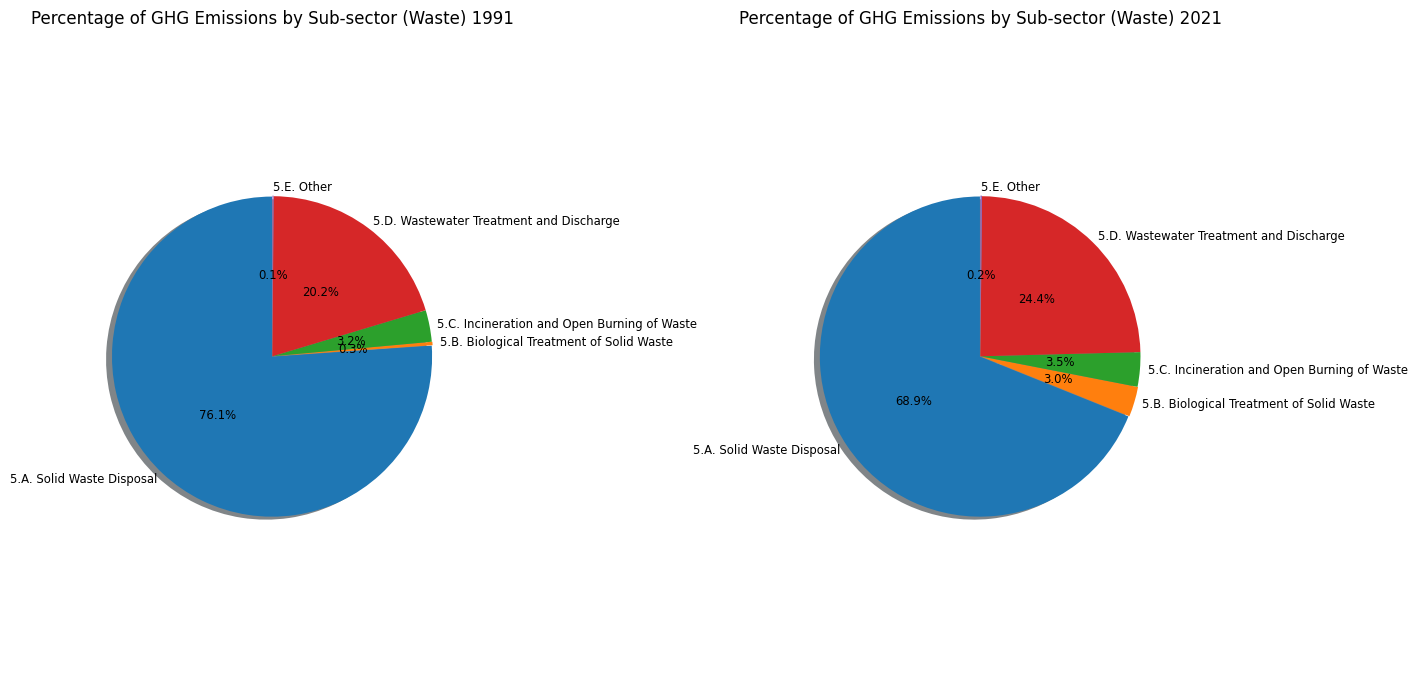

In [39]:
#  Pie chart for GHS emissions comparison per  sub sector "waste " for the year 1991 and 2021

total_emissions_1991_waste = ghg_emissions_sector_1991_waste_df.loc[0,"1991"]
total_emissions_1991_waste
total_emissions_2021_waste = ghg_emissions_sector_2021_waste_df.loc[0,"2021"]
total_emissions_2021_waste

for i in range(len(ghg_emissions_sector_1991_waste_df)):
    ghg_emissions_sector_1991_waste_df.loc[i, "Percentage"] = (ghg_emissions_sector_1991_waste_df.loc[i, "1991"]/ total_emissions_1991_waste) * 100

for i in range(len(ghg_emissions_sector_2021_waste_df)):
    ghg_emissions_sector_2021_waste_df.loc[i, "Percentage"] = (ghg_emissions_sector_2021_waste_df.loc[i, "2021"]/ total_emissions_2021_waste) * 100
# plot for 1991
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
explode = (0.005, 0.005, 0, 0, 0.005)
labels = ghg_emissions_sector_1991_waste_df["GHG emissions, kt CO2 equivalent"][1:]
sizes = ghg_emissions_sector_1991_waste_df["Percentage"][1:]
plt.pie(sizes,explode= explode, labels=labels, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},textprops={'size':'smaller'}, radius=1.5,pctdistance=0.50,labeldistance=1.05, startangle=90)
plt.title('Percentage of GHG Emissions by Sub-sector (Waste) 1991')
plt.axis('equal') 
#  plot for 2021
plt.subplot(1,2,2)
lables = ghg_emissions_sector_2021_waste_df["GHG emissions, kt CO2 equivalent"][1:]
sizes = ghg_emissions_sector_2021_waste_df["Percentage"][1:]
plt.pie(sizes,explode= explode, labels=labels, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},textprops={'size': 'smaller'}, radius=1.5,pctdistance=0.50,labeldistance=1.05, startangle=90)

plt.title('Percentage of GHG Emissions by Sub-sector (Waste) 2021')
plt.axis('equal') 
plt.tight_layout() 
plt.show()

In [40]:
# Create a visualization for the  correlation between Percentage of GHG Emissions by Waste sub-sector (1991 vs 2021)
percentages_1991_waste = ghg_emissions_sector_1991_waste_df["Percentage"][1:]
percentages_2021_waste = ghg_emissions_sector_2021_waste_df["Percentage"][1:]

# Create a DataFrame 
data_waste = pd.DataFrame({'1991': percentages_1991_waste, '2021': percentages_2021_waste})

# Scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data_waste['1991'],
    y=data_waste['2021'],
    mode='markers',
    marker=dict(color='blue'),  # Define marker color
    name='Data'
))

# Add regression line
fig.add_trace(go.Scatter(
    x=data_waste['1991'],
    y=np.poly1d(np.polyfit(data_waste['1991'], data_waste['2021'], 1))(data_waste['1991']),
    mode='lines',
    marker=dict(color='red'),  # Define line color
    name='Regression Line'
))

# Annotation for correlation coefficient
correlation_coefficient_waste = data_waste['1991'].corr(data_waste['2021'])
fig.add_annotation(
    x=0.1, y=0.9,
    xref='paper', yref='paper',
    text=f'Correlation coefficient: {correlation_coefficient_waste:.2f}',
    showarrow=False
)

# Update layout
fig.update_layout(
    title='Correlation between Percentage of GHG Emissions by Waste sub-sector (1991 vs 2021)',
    xaxis_title='Percentage in 1991',
    yaxis_title='Percentage in 2021',
    showlegend=True
)

# Show plot
fig.show()


Bar chart for energy sector 1991 and 2021

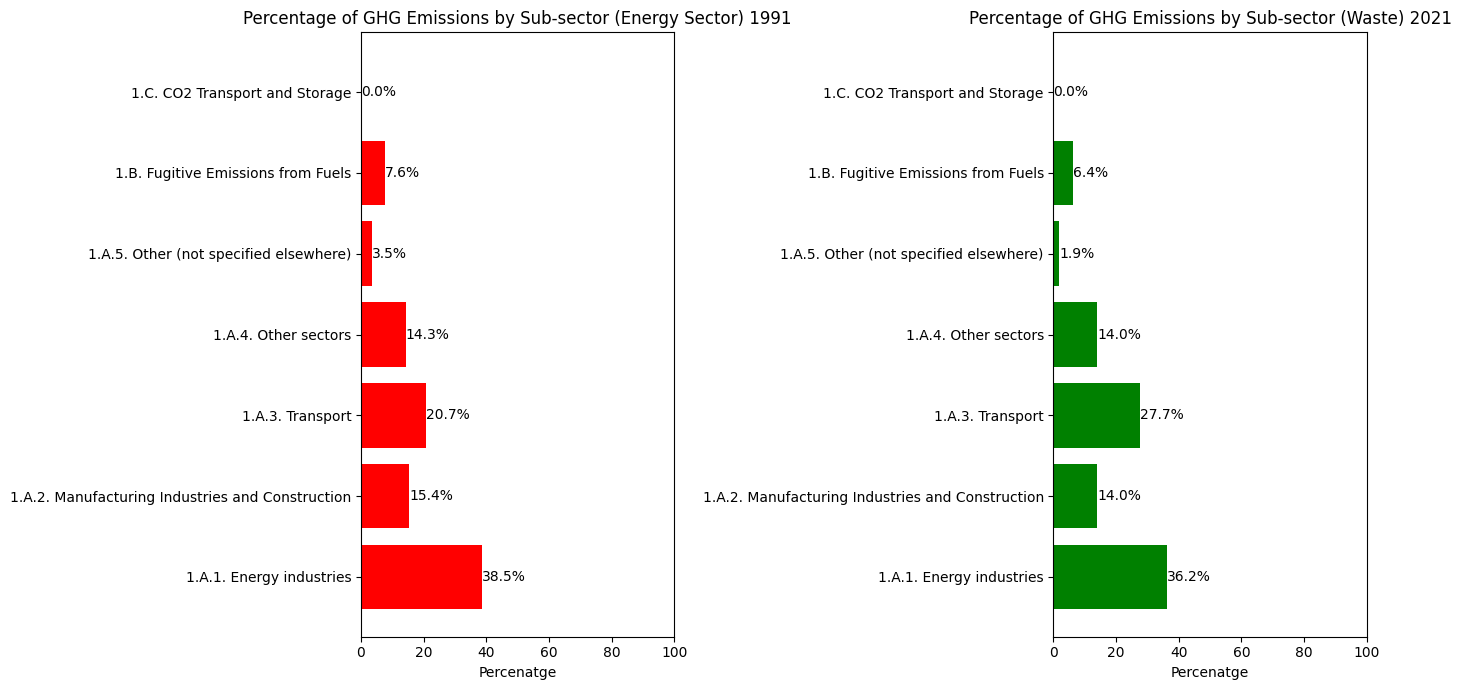

In [41]:

#  Bar chart for the GHS emissions comparison for the  sub-sector " energy sector" between  the year 1991 and 2021
total_emissions_1991_energy_sector = ghg_emissions_sector_1991_energy_sector_df.loc[0,"1991"]
total_emissions_1991_energy_sector
total_emissions_2021_energy_sector= ghg_emissions_sector_2021_energy_sector_df.loc[0,"2021"]
total_emissions_2021_energy_sector
for i in range(len(ghg_emissions_sector_1991_energy_sector_df)):
    ghg_emissions_sector_1991_energy_sector_df.loc[i, "Percentage"] = (ghg_emissions_sector_1991_energy_sector_df.loc[i, "1991"]/ total_emissions_1991_energy_sector) * 100

for i in range(len(ghg_emissions_sector_2021_energy_sector_df)):
    ghg_emissions_sector_2021_energy_sector_df.loc[i, "Percentage"] = (ghg_emissions_sector_2021_energy_sector_df.loc[i, "2021"]/ total_emissions_2021_energy_sector) * 100
       
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)

labels = ghg_emissions_sector_1991_energy_sector_df["GHG emissions, kt CO2 equivalent"][1:]
sizes = ghg_emissions_sector_1991_energy_sector_df["Percentage"][1:]
bars = plt.barh(labels, sizes, color='red')
plt.xlabel("Percenatge")

plt.title('Percentage of GHG Emissions by Sub-sector (Energy Sector) 1991')
plt.xlim(0, 100)
# Annotate each bar with its percentage value for both plots

for bar, size in zip(bars, sizes):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{size:.1f}%', 
             va='center', ha='left')
plt.subplot(1,2,2)
lables = ghg_emissions_sector_2021_energy_sector_df["GHG emissions, kt CO2 equivalent"][1:]
sizes = ghg_emissions_sector_2021_energy_sector_df["Percentage"][1:]
bars = plt.barh(labels, sizes, color='green')
plt.xlabel("Percenatge")
plt.title('Percentage of GHG Emissions by Sub-sector (Waste) 2021')
# Annotate each bar with its percentage value for both plots

for bar, size in zip(bars, sizes):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{size:.1f}%', 
             va='center', ha='left')
plt.xlim(0, 100)
plt.tight_layout()  
plt.show()

In [42]:
# Create a visualization for the  correlation between Percentage of GHG Emissions by Energy Sector sub-sector (1991 vs 2021)


percentages_1991 = ghg_emissions_sector_1991_energy_sector_df["Percentage"][1:]
percentages_2021 = ghg_emissions_sector_2021_energy_sector_df["Percentage"][1:]

# Create a DataFrame 
data = pd.DataFrame({'1991': percentages_1991, '2021': percentages_2021})

# Scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data['1991'],
    y=data['2021'],
    mode='markers',
    marker=dict(color='blue'),  # Define marker color
    name='Data'
))

# Add regression line
fig.add_trace(go.Scatter(
    x=data['1991'],
    y=np.poly1d(np.polyfit(data['1991'], data['2021'], 1))(data['1991']),
    mode='lines',
    marker=dict(color='red'),  # Define line color
    name='Regression Line'
))

# Annotation for correlation coefficient
correlation_coefficient = data['1991'].corr(data['2021'])
fig.add_annotation(
    x=0.1, y=0.9,
    xref='paper', yref='paper',
    text=f'Correlation coefficient: {correlation_coefficient:.2f}',
    showarrow=False
)

# Update layout
fig.update_layout(
    title='Correlation between Percentage of GHG Emissions by Energy Sector sub-sector (1991 vs 2021)',
    xaxis_title='Percentage in 1991',
    yaxis_title='Percentage in 2021',
    showlegend=True
)

# Show plot
fig.show()


Line chart for industrial_processes_product_use sector 1991 and 2021

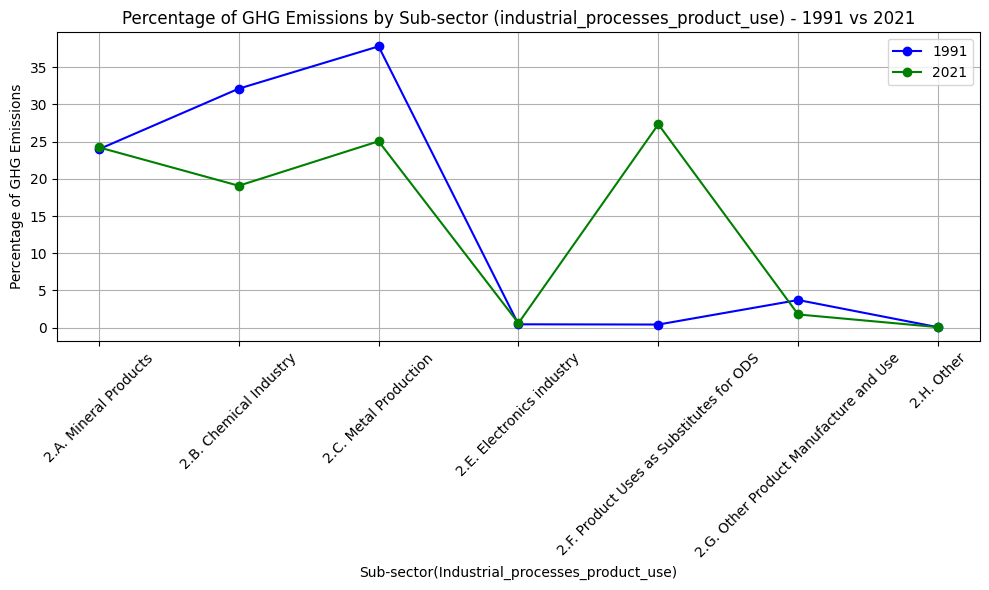

In [43]:
#  Line chart for the GHS emissions comparison for the  sub-sector " industrial_processes_product_use" between  the year 1991 and 2021

total_emissions_1991_industrial_processes_product_use = ghg_emissions_sector_1991_industrial_processes_product_use_df.loc[0,"1991"]
total_emissions_1991_industrial_processes_product_use
total_emissions_2021_industrial_processes_product_use = ghg_emissions_sector_2021_industrial_processes_product_use_df.loc[0,"2021"]
total_emissions_2021_industrial_processes_product_use
for i in range(len(ghg_emissions_sector_1991_industrial_processes_product_use_df)):
    ghg_emissions_sector_1991_industrial_processes_product_use_df.loc[i, "Percentage"] = (ghg_emissions_sector_1991_industrial_processes_product_use_df.loc[i, "1991"]/ total_emissions_1991_industrial_processes_product_use) * 100

for i in range(len(ghg_emissions_sector_2021_industrial_processes_product_use_df)):
    ghg_emissions_sector_2021_industrial_processes_product_use_df.loc[i, "Percentage"] = (ghg_emissions_sector_2021_industrial_processes_product_use_df.loc[i, "2021"]/ total_emissions_2021_industrial_processes_product_use) * 100
   
labels_1991 = ghg_emissions_sector_1991_industrial_processes_product_use_df["GHG emissions, kt CO2 equivalent"][1:]
sizes_1991 = ghg_emissions_sector_1991_industrial_processes_product_use_df["Percentage"][1:]

labels_2021 = ghg_emissions_sector_2021_industrial_processes_product_use_df["GHG emissions, kt CO2 equivalent"][1:]
sizes_2021 = ghg_emissions_sector_2021_industrial_processes_product_use_df["Percentage"][1:]

# Plot the line chart
plt.figure(figsize=(10, 6))

# Line chart for 1991
plt.plot(labels_1991, sizes_1991, marker='o', color='blue', label='1991')

# Line chart for 2021
plt.plot(labels_2021, sizes_2021, marker='o', color='green', label='2021')

plt.xlabel('Sub-sector(Industrial_processes_product_use)')
plt.ylabel('Percentage of GHG Emissions')
plt.title('Percentage of GHG Emissions by Sub-sector (industrial_processes_product_use) - 1991 vs 2021')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


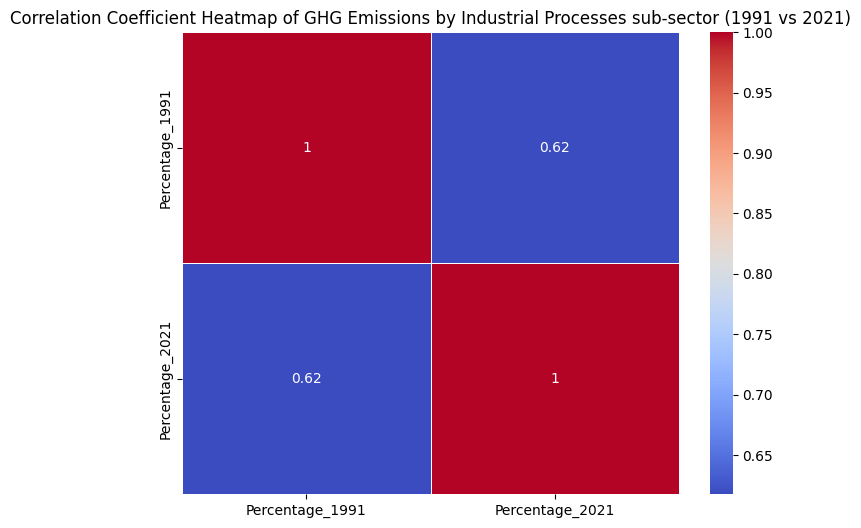

In [44]:

# Create a visualization for the  correlation between Percentage of GHG Emissions by Indudtrial Processes sub-sector (1991 vs 2021)
percentages_1991 = ghg_emissions_sector_1991_industrial_processes_product_use_df["Percentage"][1:]
percentages_2021 = ghg_emissions_sector_2021_industrial_processes_product_use_df["Percentage"][1:]

# Create a DataFrame 
data = pd.DataFrame({'Percentage_1991': percentages_1991, 'Percentage_2021': percentages_2021})

# Calculate correlation coefficient
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Coefficient Heatmap of GHG Emissions by Industrial Processes sub-sector (1991 vs 2021)')
plt.show()


#### Bar chart for the GHS emissions comparison for the  sub-sector "LULUCF(LandUseLandUseChangeForestry)" between  the year 1991 and 2021

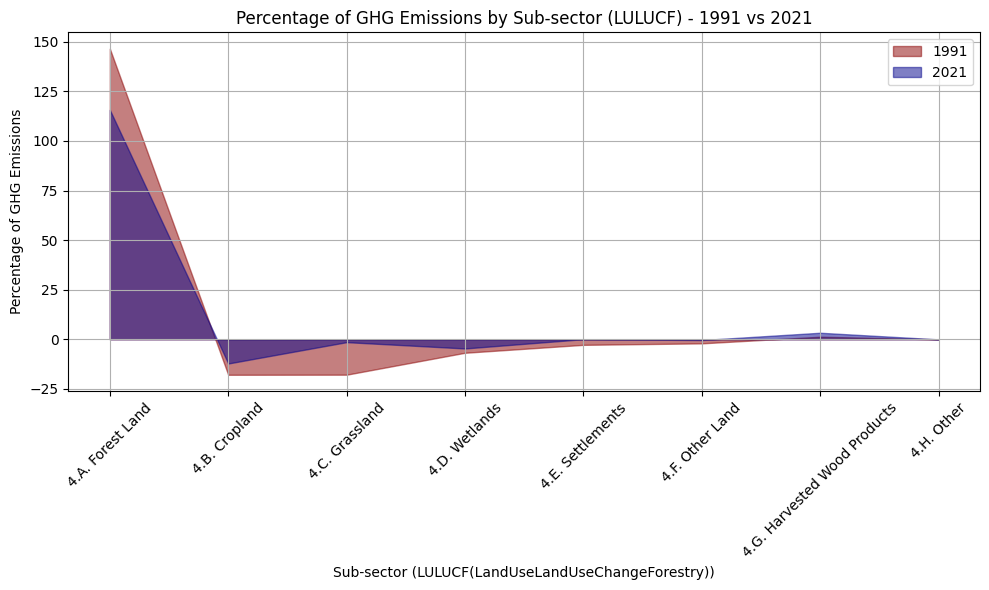

In [45]:
# Area chart for the GHS emissions comparison for the  sub-sector "LULUCF(LandUseLandUseChangeForestry)" between  the year 1991 and 2021

total_emissions_1991_LULUCF = ghg_emissions_sector_1991_LULUCF_df.loc[0,"1991"]
total_emissions_2021_LULUCF = ghg_emissions_sector_2021_LULUCF_df.loc[0,"2021"]
for i in range(len(ghg_emissions_sector_1991_LULUCF_df)):
    ghg_emissions_sector_1991_LULUCF_df.loc[i, "Percentage"] = (ghg_emissions_sector_1991_LULUCF_df.loc[i, "1991"]/ total_emissions_1991_LULUCF) * 100

for i in range(len(ghg_emissions_sector_2021_LULUCF_df)):
    ghg_emissions_sector_2021_LULUCF_df.loc[i, "Percentage"] = (ghg_emissions_sector_2021_LULUCF_df.loc[i, "2021"]/ total_emissions_2021_LULUCF) * 100
   
labels_1991 = ghg_emissions_sector_1991_LULUCF_df["GHG emissions, kt CO2 equivalent"][1:]
sizes_1991 = ghg_emissions_sector_1991_LULUCF_df["Percentage"][1:]

labels_2021 = ghg_emissions_sector_2021_LULUCF_df["GHG emissions, kt CO2 equivalent"][1:]
sizes_2021 = ghg_emissions_sector_2021_LULUCF_df["Percentage"][1:]



plt.figure(figsize=(10, 6))

# Area chart for 1991
plt.fill_between(labels_1991, sizes_1991, color='darkred', alpha=0.5, label='1991')

# Area chart for 2021
plt.fill_between(labels_2021, sizes_2021, color='darkblue', alpha=0.5, label='2021')

plt.xlabel('Sub-sector (LULUCF(LandUseLandUseChangeForestry))')
plt.ylabel('Percentage of GHG Emissions')
plt.title('Percentage of GHG Emissions by Sub-sector (LULUCF) - 1991 vs 2021')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [46]:
# Create a visualization for the  correlation between Percentage of GHG Emissions by LULUCF sub-sector (1991 vs 2021)
percentages_1991_lulucf = ghg_emissions_sector_1991_LULUCF_df["Percentage"][1:]
percentages_2021_lulucf = ghg_emissions_sector_2021_LULUCF_df["Percentage"][1:]

# Create a DataFrame for the data
data_lulucf = pd.DataFrame({'1991': percentages_1991_lulucf, '2021': percentages_2021_lulucf})

# Scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data_lulucf['1991'],
    y=data_lulucf['2021'],
    mode='markers',
    marker=dict(color='blue'),  # Define marker color
    name='Data'
))

# Add regression line
fig.add_trace(go.Scatter(
    x=data_lulucf['1991'],
    y=np.poly1d(np.polyfit(data_lulucf['1991'], data_lulucf['2021'], 1))(data_lulucf['1991']),
    mode='lines',
    marker=dict(color='red'),  # Define line color
    name='Regression Line'
))

# Annotation for correlation coefficient
correlation_coefficient_lulucf = data_lulucf['1991'].corr(data_lulucf['2021'])
fig.add_annotation(
    x=0.1, y=0.9,
    xref='paper', yref='paper',
    text=f'Correlation coefficient: {correlation_coefficient_lulucf:.2f}',
    showarrow=False
)

# Update layout
fig.update_layout(
    title='Correlation between Percentage of GHG Emissions by LULUCF sub-sector (1991 vs 2021)',
    xaxis_title='Percentage in 1991',
    yaxis_title='Percentage in 2021',
    showlegend=True
)

# Show plot
fig.show()


#### Bar chart for GHGEmission comparison for the sub-sector "agriculture" between the year 1991 and 2021

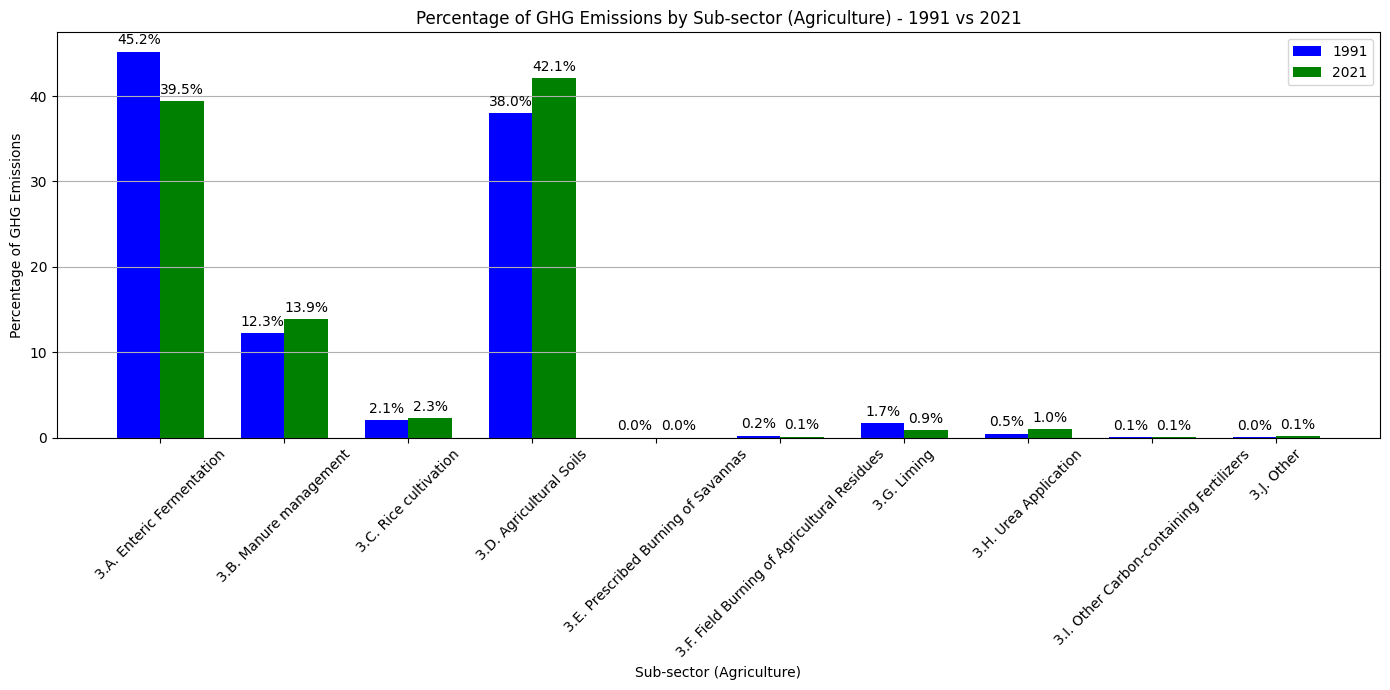

In [47]:
# Bar  chart for the GHS emissions comparison for the  sub-sector  agriculture between  the year 1991 and 2021

total_emissions_1991_agriculture = ghg_emissions_sector_1991_agriculture_df.loc[0,"1991"]
total_emissions_2021_agriculture = ghg_emissions_sector_2021_agriculture_df.loc[0,"2021"]
for i in range(len(ghg_emissions_sector_1991_agriculture_df)):
    ghg_emissions_sector_1991_agriculture_df.loc[i, "Percentage"] = (ghg_emissions_sector_1991_agriculture_df.loc[i, "1991"]/ total_emissions_1991_agriculture) * 100

for i in range(len(ghg_emissions_sector_2021_agriculture_df)):
    ghg_emissions_sector_2021_agriculture_df.loc[i, "Percentage"] = (ghg_emissions_sector_2021_agriculture_df.loc[i, "2021"]/ total_emissions_2021_agriculture) * 100
   


l_1991 = ghg_emissions_sector_1991_agriculture_df["GHG emissions, kt CO2 equivalent"][1:]
s_1991 = ghg_emissions_sector_1991_agriculture_df["Percentage"][1:]

l_2021 = ghg_emissions_sector_2021_agriculture_df["GHG emissions, kt CO2 equivalent"][1:]
s_2021 = ghg_emissions_sector_2021_agriculture_df["Percentage"][1:]
l_1991 = [str(label) for label in l_1991]
l_2021 = [str(label) for label in l_2021]


labels = l_1991  
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

# Bar chart for 1991
bars_1991 = ax.bar(x - width/2, s_1991, width, color='blue', label='1991')

# Bar chart for 2021
bars_2021 = ax.bar(x + width/2, s_2021, width, color='green', label='2021')


ax.set_xlabel('Sub-sector (Agriculture)')
ax.set_ylabel('Percentage of GHG Emissions')
ax.set_title('Percentage of GHG Emissions by Sub-sector (Agriculture) - 1991 vs 2021')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
ax.grid(axis='y')
# Attach a text label above each bar in *rects*, displaying its height as percentage
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        percentage = height  
        ax.annotate('{:.1f}%'.format(percentage),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bars_1991)
autolabel(bars_2021)

fig.tight_layout()

plt.show()


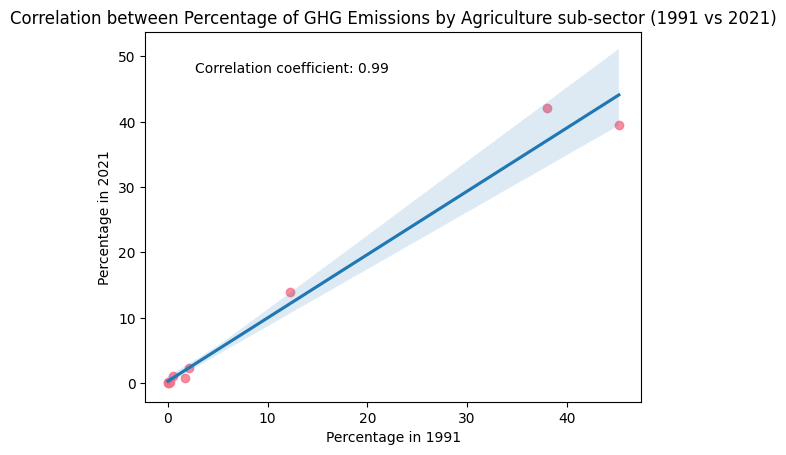

In [48]:

# Create a visualization for the  correlation between Percentage of GHG Emissions by Agriculture sub-sector (1991 vs 2021)

# Extract "Percentage" values for both years
percentages_1991 = ghg_emissions_sector_1991_agriculture_df["Percentage"][1:]
percentages_2021 = ghg_emissions_sector_2021_agriculture_df["Percentage"][1:]

# Create a DataFrame for the data
data = pd.DataFrame({'1991': percentages_1991, '2021': percentages_2021})

# Define a color palette
palette = sns.color_palette("husl")

# Plot a scatter plot with regression line and correlation coefficient
sns.regplot(x='1991', y='2021', data=data, scatter_kws={"color": palette[0]})
plt.title('Correlation between Percentage of GHG Emissions by Agriculture sub-sector (1991 vs 2021)')
plt.xlabel('Percentage in 1991')
plt.ylabel('Percentage in 2021')

# Calculate correlation coefficient
correlation_coefficient = data['1991'].corr(data['2021'])
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', 
         horizontalalignment='left', verticalalignment='center', 
         transform=plt.gca().transAxes)

plt.show()


In [49]:

percentages_1991 = ghg_emissions_sector_1991_agriculture_df["Percentage"][1:]
percentages_2021 = ghg_emissions_sector_2021_agriculture_df["Percentage"][1:]

# Create a DataFrame 
data = pd.DataFrame({'1991': percentages_1991, '2021': percentages_2021})

# Scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data['1991'],
    y=data['2021'],
    mode='markers',
    marker=dict(color='blue'),  # Define marker color
    name='Data'
))

# Add regression line
fig.add_trace(go.Scatter(
    x=data['1991'],
    y=np.poly1d(np.polyfit(data['1991'], data['2021'], 1))(data['1991']),
    mode='lines',
    marker=dict(color='red'),  # Define line color
    name='Regression Line'
))

# Annotation for correlation coefficient
correlation_coefficient = data['1991'].corr(data['2021'])
fig.add_annotation(
    x=0.1, y=0.9,
    xref='paper', yref='paper',
    text=f'Correlation coefficient: {correlation_coefficient:.2f}',
    showarrow=False
)

# Update layout
fig.update_layout(
    title='Correlation between Percentage of GHG Emissions by Agriculture sub-sector (1991 vs 2021)',
    xaxis_title='Percentage in 1991',
    yaxis_title='Percentage in 2021',
    showlegend=True
)

# Show plot
fig.show()


### Climate Change Data Analysis Based On Green House Gas Emissions Data by different types of gas between the years 1991 and 2021

In [50]:
df_ghg_annexi_gas= pd.read_excel("data/green_house_gas/ghg_main_UNFCCC/ghg_AnnexI/ANI_ghg_profile.xlsx",sheet_name="Data_by_gas")
df_ghg_annexi_gas.info()
df_ghg_annexi_gas.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GHG emissions, kt CO2 equivalent  24 non-null     object 
 1   Base year                         22 non-null     float64
 2   1990                              22 non-null     float64
 3   1991                              22 non-null     float64
 4   1992                              22 non-null     float64
 5   1993                              22 non-null     float64
 6   1994                              22 non-null     float64
 7   1995                              22 non-null     float64
 8   1996                              22 non-null     float64
 9   1997                              22 non-null     float64
 10  1998                              22 non-null     float64
 11  1999                              22 non-null     float64
 12  2000      

(25, 34)

In [53]:



# Function to establish connection  to the database and execute SQL queries
def execute_queries():
    connect = sqlite3.connect('GHG_ANI.db')
    df_ghg_annexi_gas.to_sql(name='ghg_annexi_gas', con=connect, if_exists='replace', index=False)
    connect.commit()
    connect.close()

# Retry mechanism for error handling 
max_retries = 5
retry_delay = 1  # in seconds

for attempt in range(1, max_retries + 1):
    try:
        execute_queries()
        print("SQL queries executed successfully.")
        break
    except sqlite3.DatabaseError as e:
        print(f"Attempt {attempt} failed:", e)
        if attempt < max_retries:
            print("Retrying after", retry_delay, "seconds...")
            time.sleep(retry_delay)
        else:
            print("Max retries exceeded. Unable to execute SQL queries.")


SQL queries executed successfully.


In [54]:
# Checking for the tables 
table_test_query = """
    SELECT name FROM sqlite_master 
    WHERE type='table';
    """
try:
    with sqlite3.connect("GHG_ANI.db") as connect:
        cur_table = connect.cursor()
        cur_table.execute(table_test_query)
        print(cur_table.fetchall())
except sqlite3.Error as e:
    print("SQLite error:", e)

[('ghg_annexi_gas_without_LULUCF_percentage_table',), ('ghg_annexi_gas',)]


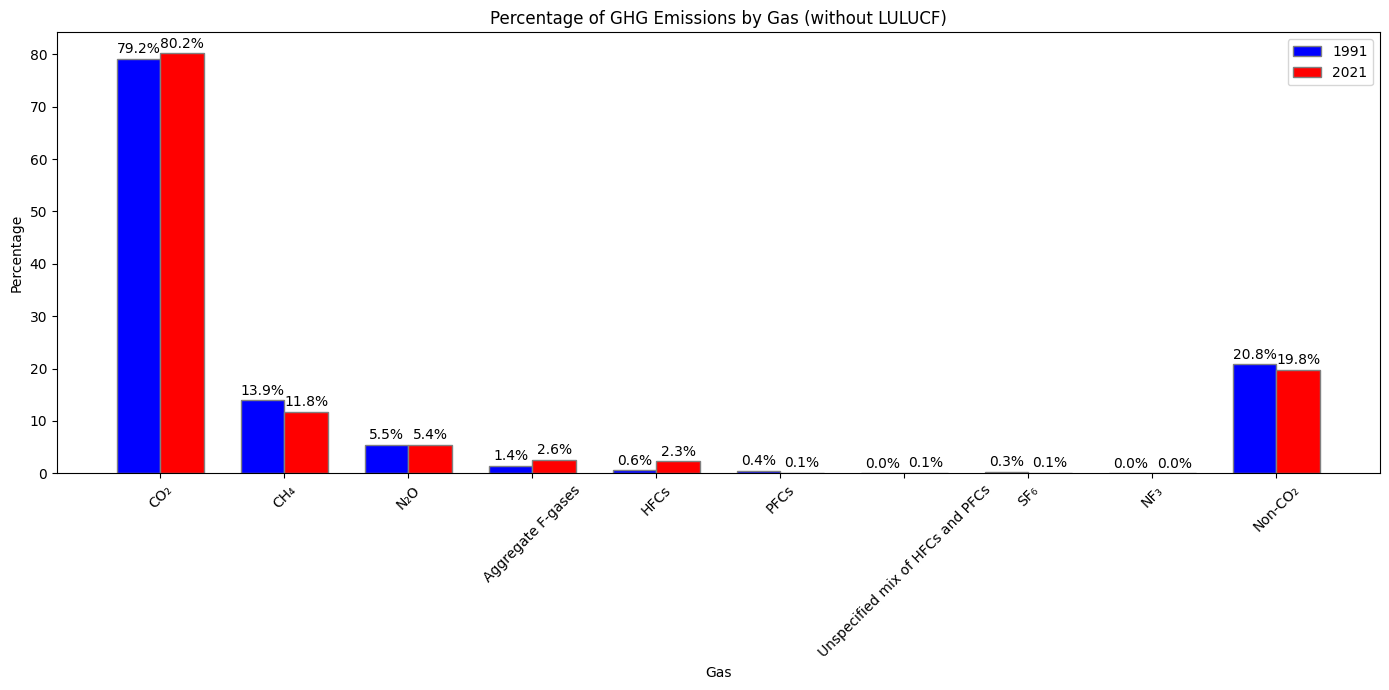

In [55]:
# Clean up the table with SQLite queries
connect_db= sqlite3.connect('GHG_ANI.db')
curr = connect_db.cursor()

curr.execute('ALTER TABLE ghg_annexi_gas DROP COLUMN "1990"')
curr.execute('ALTER TABLE ghg_annexi_gas DROP COLUMN "Base year"')
curr.execute('''
               DELETE FROM ghg_annexi_gas
               WHERE "GHG emissions, kt CO2 equivalent" = 'GHG emissions without LULUCF'
               OR "1991" IS NULL
               ''')

ghg_annexi_gas_query = ('''
                            SELECT "GHG emissions, kt CO2 equivalent","1991","2021"  FROM ghg_annexi_gas
                        ''')
# Check the table data for gases with and without LULUCF
ghg_annexi_gas_without_LULUCF_query = ("""
                                       SELECT "GHG emissions, kt CO2 equivalent","1991","2021"
                                         FROM ghg_annexi_gas
                                        LIMIT 11
                                       """)
ghg_annexi_gas_with_LULUCF_query = ("""
                                    SELECT "GHG emissions, kt CO2 equivalent","1991","2021"
                                    FROM ghg_annexi_gas
                                    LIMIT 11 OFFSET 11
                                    """)
#  Create the temp table for storing the total GHG of gases WITH and WITHOUT LULUCF
curr.execute('''    
    CREATE TEMP TABLE total_ghg AS
    SELECT
        (SELECT "1991" FROM ghg_annexi_gas LIMIT 1 OFFSET 10) AS total_1991,
        (SELECT "2021" FROM ghg_annexi_gas LIMIT 1 OFFSET 10) AS total_2021
''')

# Create the percentage  table for GHS of gases WITH and WITHOUT LULUCF
curr.execute('''
    CREATE TABLE IF NOT EXISTS ghg_annexi_gas_without_LULUCF_percentage_table AS
    SELECT
        "GHG emissions, kt CO2 equivalent","1991","2021",
        "1991" * 100.0 / (SELECT total_1991 FROM total_ghg) AS percentage_1991,
        "2021" * 100.0 / (SELECT total_2021 FROM total_ghg) AS percentage_2021
    FROM
        ghg_annexi_gas
''')
#  Filter the percentage data only for different gases WITHOUT LULUCF
curr.execute("""
                SELECT "GHG emissions, kt CO2 equivalent",percentage_1991,percentage_2021 FROM ghg_annexi_gas_without_LULUCF_percentage_table
             LIMIT 10
            """)
# Fetch the data from the percentage table for data visualization purpose
ghg_annexi_gas_without_LULUCF_percentage_query_list= curr.fetchall()
curr.close()
connect_db.commit()
connect_db.close()


labels = []
sizes_1991 =[]
sizes_2021 =[]
# Iterate through the list for displaying the bar chart
labels = [row[0] for row in ghg_annexi_gas_without_LULUCF_percentage_query_list]
sizes_1991 = [row[1] for row in ghg_annexi_gas_without_LULUCF_percentage_query_list]
sizes_2021 = [row[2] for row in ghg_annexi_gas_without_LULUCF_percentage_query_list]

# Ensure labels and sizes_1991 have the same length
if len(labels) != len(sizes_1991):
   raise ValueError("Length of 'labels' must be equal to the length of 'sizes_1991'")
bar_width = 0.35
# Set the positions of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.figure(figsize=(14, 7))
plt.bar(r1, sizes_1991, color='b', width=bar_width, edgecolor='grey', label='1991')
plt.bar(r2, sizes_2021, color='r', width=bar_width, edgecolor='grey', label='2021')

# Add labels and title
plt.xlabel('Gas')
plt.ylabel('Percentage')
plt.title('Percentage of GHG Emissions by Gas (without LULUCF)')
plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels, rotation=45)
plt.legend()
# Print percentage values on top of each bar
for i in r1:
    plt.text(i, sizes_1991[i] + 0.5, f"{sizes_1991[i]:.1f}%", ha='center', va='bottom', color='black')

for i in r2:
    plt.text(i, sizes_2021[int(i)] + 0.5, f"{sizes_2021[int(i)]:.1f}%", ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


                      

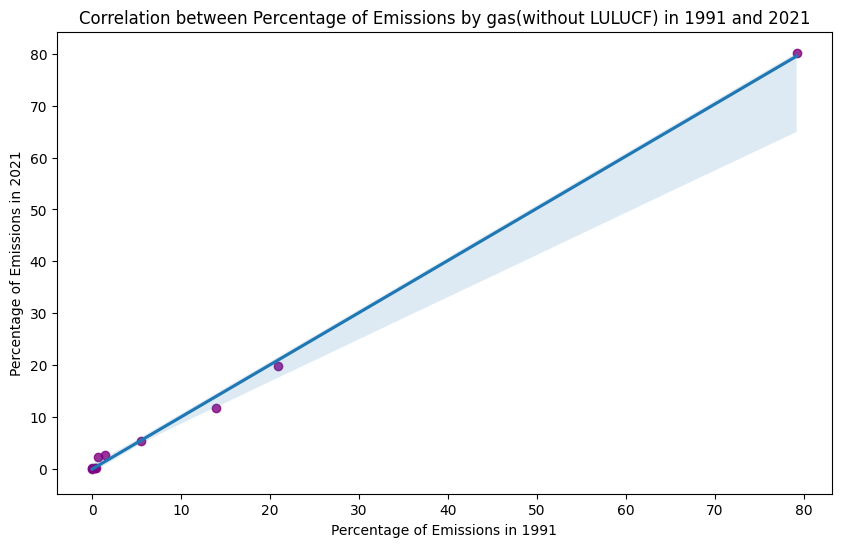

In [56]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=sizes_1991, y=sizes_2021,scatter_kws={'color': 'purple'})
# Add labels and title
plt.xlabel('Percentage of Emissions in 1991')
plt.ylabel('Percentage of Emissions in 2021')
plt.title('Correlation between Percentage of Emissions by gas(without LULUCF) in 1991 and 2021')
plt.show()


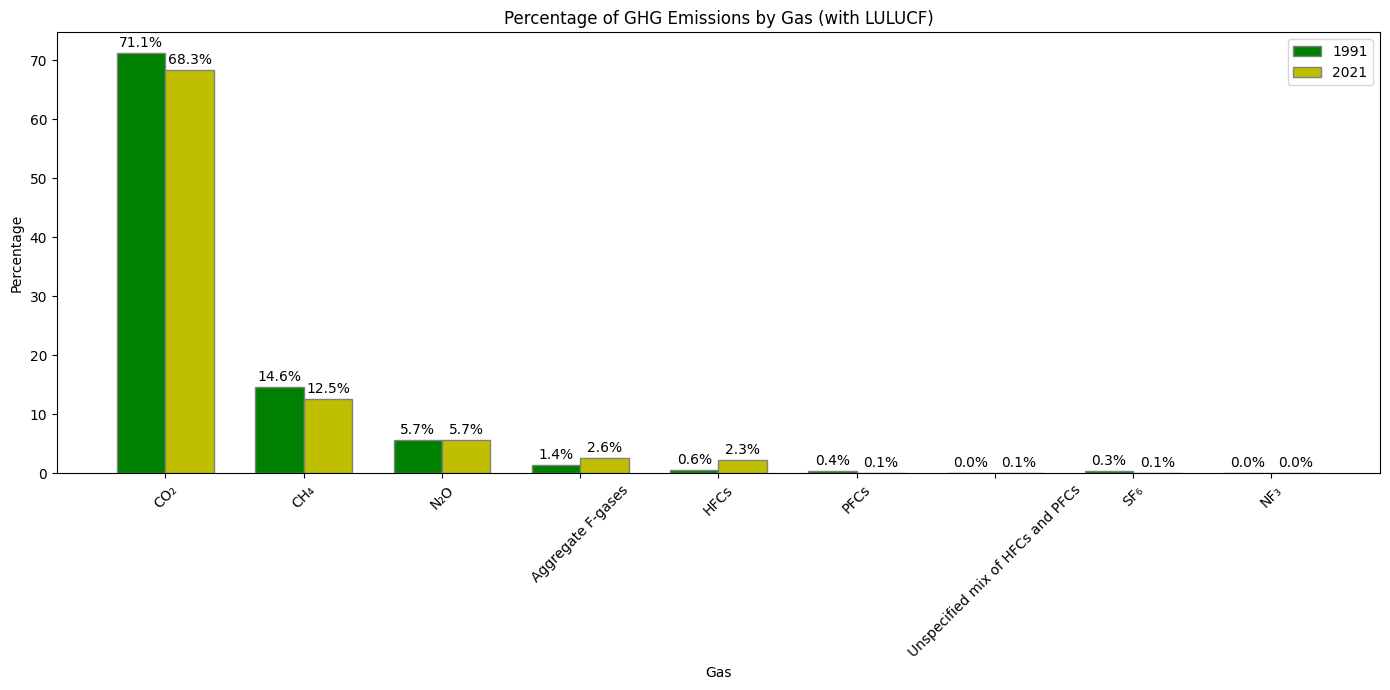

In [57]:
# Filter the percentage data only for different gases WITH LULUCF
connect_LULUCF_db= sqlite3.connect('GHG_ANI.db')
curr_LULUCF = connect_LULUCF_db.cursor()

curr_LULUCF.execute("""
                SELECT "GHG emissions, kt CO2 equivalent",percentage_1991,percentage_2021 FROM ghg_annexi_gas_without_LULUCF_percentage_table
             LIMIT 9 OFFSET 11
            """)
ghg_annexi_gas_with_LULUCF_percentage_query_list= curr_LULUCF.fetchall()
curr_LULUCF.close()
connect_LULUCF_db.commit()
connect_LULUCF_db.close()

labels = []
sizes_1991 =[]
sizes_2021 =[]
    
labels = [row[0] for row in ghg_annexi_gas_with_LULUCF_percentage_query_list]
sizes_1991 = [row[1] for row in ghg_annexi_gas_with_LULUCF_percentage_query_list]
sizes_2021 = [row[2] for row in ghg_annexi_gas_with_LULUCF_percentage_query_list]

# Ensure labels and sizes_1991 have the same length
if len(labels) != len(sizes_1991):
   raise ValueError("Length of 'labels' must be equal to the length of 'sizes_1991'")
bar_width = 0.35
# Set the positions of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.figure(figsize=(14, 7))
plt.bar(r1, sizes_1991, color='g', width=bar_width, edgecolor='grey', label='1991')
plt.bar(r2, sizes_2021, color='y', width=bar_width, edgecolor='grey', label='2021')

# Add labels and title
plt.xlabel('Gas')
plt.ylabel('Percentage')
plt.title('Percentage of GHG Emissions by Gas (with LULUCF)')
plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels, rotation=45)
plt.legend()
# Print percentage values on top of each bar
for i in r1:
    plt.text(i, sizes_1991[i] + 0.5, f"{sizes_1991[i]:.1f}%", ha='center', va='bottom', color='black')

for i in r2:
    plt.text(i, sizes_2021[int(i)] + 0.5, f"{sizes_2021[int(i)]:.1f}%", ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


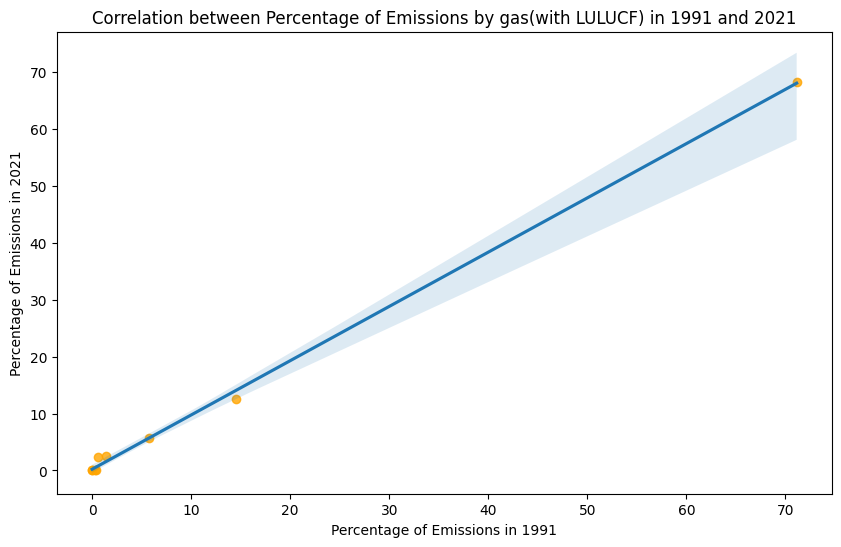

In [58]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=sizes_1991, y=sizes_2021,scatter_kws={'color': 'orange'})
# Add labels and title
plt.xlabel('Percentage of Emissions in 1991')
plt.ylabel('Percentage of Emissions in 2021')
plt.title('Correlation between Percentage of Emissions by gas(with LULUCF) in 1991 and 2021')
plt.show()


## Climate Change Data Analysis Based On Green House Gas Emissions Data across 44 countries(UN ANNEX I list) between the years 1991 and 2021

In [59]:


ghg_annexi_countries_df= pd.read_excel("data/green_house_gas/ghg_main_UNFCCC/ghg_Time_Series_UNFCCC/Time Series - GHG total with LULUCF, in kt CO₂ equivalent.xlsx",sheet_name="Sheet1",header=1,skiprows=1)
ghg_annexi_countries_df.shape
ghg_annexi_countries_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Party      52 non-null     object 
 1   Base year  44 non-null     float64
 2   1990       44 non-null     float64
 3   1991       44 non-null     float64
 4   1992       44 non-null     float64
 5   1993       44 non-null     float64
 6   1994       44 non-null     float64
 7   1995       44 non-null     float64
 8   1996       44 non-null     float64
 9   1997       44 non-null     float64
 10  1998       44 non-null     float64
 11  1999       44 non-null     float64
 12  2000       44 non-null     float64
 13  2001       44 non-null     float64
 14  2002       44 non-null     float64
 15  2003       44 non-null     float64
 16  2004       44 non-null     float64
 17  2005       44 non-null     float64
 18  2006       44 non-null     float64
 19  2007       44 non-null     float64
 20  2008       4

Drop the columns 

In [62]:
columns_to_drop = ['Base year','1990','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
ghg_annexi_countries_df.drop(columns_to_drop,axis=1,inplace=True)

Drop the rows which has NAN values 

In [64]:
ghg_annexi_countries_df.dropna(inplace=True)

In [65]:

ghg_annexi_countries_df.reset_index(drop=True, inplace=True)

In [67]:
# Copying the DataFrame to keep the original intact
ghg_annexi_countries_percentage_df = ghg_annexi_countries_df.copy()

# Iterate over each column except the first one (assuming it contains country names)
for col in ghg_annexi_countries_percentage_df.columns[1:]:
    # Calculate the sum of the column
    col_sum = ghg_annexi_countries_percentage_df[col].sum()
    
    # Calculate the percentage for each value in the column
    ghg_annexi_countries_percentage_df[col] = (ghg_annexi_countries_percentage_df[col] / col_sum) * 100

# Rename the columns
ghg_annexi_countries_percentage_df = ghg_annexi_countries_percentage_df.rename(columns={"1991": "Percentage_1991", 2021: "Percentage_2021"})



Create  horizontal bar graph using Plotly as there are 44 countries on the Y- axis

In [68]:
# Create the grouped horizontal bar chart
fig = px.bar(ghg_annexi_countries_percentage_df, 
             y='Party', 
             x=['Percentage_1991', 'Percentage_2021'], 
             orientation='h', 
             title='Percentage of Emissions by Country in 1991 and 2021',
             labels={'value': 'Percentage of Emissions', 'variable': 'Year'},
             color_discrete_sequence=px.colors.qualitative.Set1,
             template='plotly_dark',
             width=800,
             height=1000
            )

# Update layout
fig.update_layout(
    xaxis=dict(title='Percentage of Emissions (%)'),
    yaxis=dict(title=None),
    legend_title='Year',
    margin=dict(l=200, r=50, t=100, b=100),
    barmode='group'
)


In [69]:


# Create a scatter plot
fig = px.scatter(ghg_annexi_countries_percentage_df, 
                 x='Percentage_1991', 
                 y='Percentage_2021', 
                 title='Correlation between Percentage of Emissions in 1991 and 2021',
                 labels={'Percentage_1991': 'Percentage of Emissions in 1991', 'Percentage_2021': 'Percentage of Emissions in 2021'},
                 template='plotly_dark',
                 width=800,
                 height=600
                )

# Update layout
fig.update_layout(
    xaxis=dict(title='Percentage of Emissions in 1991 (%)'),
    yaxis=dict(title='Percentage of Emissions in 2021 (%)'),
    margin=dict(l=50, r=50, t=100, b=50),
)

# Show the plot
fig.show()
